# Audio Signals Khaliq Aghakarimov

## Intro Khaliq Aghakarimov


In this chapter, you will import and export sounds, so we need to read and write files on the disk. But which disk? 

### To mount your gdrive (for colab only) Khaliq Aghakarimov


***NB:*** If you work without colab, you can skip this section. 



Colab gives you a  virtural-server, somewhere on the cloud. So, by default, you read and write on the disk associated to this virtual-server. The problem is that it auto-destructs after a while. So you need to download your creations regularly. For this two solutions: 

* 1/ by right-clicking of the file in the `File` menu
* 2/ by using:

      from google.colab import files
      files.download('myCreation.wav')


But a better solution is to mount an external disk: With a gmail account is associated a cloud-disk called google-drive (=gdrive).  To mount the gdrive will virtualy put it into the virtual-server.  Proceed as follows:

* runing the next cell
* click to the link which appears
* choose one of your google account
* enter your password
*  an access-code is given, copy-past in the cell, and push enter







In [0]:
from google.colab import drive
drive.mount('/gdrive')

Move into your drive


In [0]:
%cd /gdrive/My\ Drive


Warning: If you want to interact with your gdrive (ex: add or move files), it is better to work with chrome. But for security reasons, it is  important than chrome and gdrive are associates to the same google-account (the icons in the up-right corner must be the sames). If not, there are some restrictions (ex: you cannot download files).  

But for all that we do via colab, this account compatibility is useless. 

### Without colab Khaliq Aghakarimov


If you work locally, with jupyter-lab, you will just read and write file on your own disk. You simply have to go on the part of your file structure, ex:

    %cd /myPytonPrograms
   

### Create dir structure Khaliq Aghakarimov

We create a working directory from where we are. If it is already here, this do nothing.

In [0]:
%mkdir vigonLectures
%mkdir vigonLectures/signal

We move into this directory

Now, all the file created will be writen in this working directory. And if you want to import a sound file, just put it in this directory, (ex: via the classic gdrive interface if you use it).



In [0]:
%cd vigonLectures/signal

### pull some data from github Khaliq Aghakarimov

> Indented block



In [0]:
"we import (=clone) all the data or just update (=pull) them"

import os

if not os.path.exists("assets_signal"):
    print("the directory assets_signal is create")
    !git clone https://github.com/vincentvigon/assets_signal
else:
    print("the directory assets_signal is updated")
    %cd assets_signal
    !git pull https://github.com/vincentvigon/assets_signal
    %cd ..
    

### basic imports Khaliq Aghakarimov

> Indented block



In [0]:
%reset -f
import numpy as np
import matplotlib.pyplot as plt
import IPython

np.set_printoptions(linewidth=500,precision=3,suppress=True)
plt.style.use("default")

## Sounds Khaliq Aghakarimov

### Import a sound file Khaliq Aghakarimov

I want to import and export sound file with python. How can I do? 

I ask to google ->  "python read write sound files"

Often, the best place to see the answer is stackoverflow. I look at the debates:

* Some people say that `PySoundFile` is the more complete lib. 
* But I see that `scipy` has also a `io.wavfile` package. Because I already have `scipy`, I try it in first. It is OK to import sounds, but not so good to export them: the generate sounds cannot be easily open. 
* so finaly, I used  `PySoundFile`


In [0]:
!pip install PySoundFile

In [0]:
"""recall: samplerate is the number of measures make in one second"""
import soundfile as sf
sound, samplerate = sf.read('assets_signal/bornwild.wav')
sound.shape,samplerate

The sound is stereo: it has two columns=two channels: the left one and the right one. 

Let's plot this signal. Oscilations are so fast, that we only see their contours. Such plot is called  "waveform" (forme d'onde), and allows to see when the sound is loud or quiet. 

In [0]:
fig,(ax0,ax1)=plt.subplots(2,1,figsize=(8,2),sharex=True)
ax0.plot(sound[:,0])
ax1.plot(sound[:,1])
ax0.set_title("left chanel")
ax1.set_title("right chanel")
fig.tight_layout()

***To you:*** 

* $(1\heartsuit)$ What is the duration of this sound. 
* $(1\heartsuit)$ Add xticks on the above plot which indicate the time. 
* $(2\heartsuit)$ Plot the very begining of this signal, to see clearly the oscilations.

In [0]:
"we plot the half-amplitude-spectrum"
sound0=sound[:,0]
half_spectrum=np.fft.rfft(sound0)
fig,ax=plt.subplots(figsize=(8,2))
N=len(half_spectrum)
freqs=np.linspace(0,samplerate/2,N)
ax.plot(np.abs(half_spectrum)/N);

NameError: ignored

***To you:*** $(1\heartsuit)$ What is the meaning of the pick at 0 ? 

To hear the sound, you can double click on the file in gdrive, but here is an easier mean:

In [0]:
IPython.display.Audio('assets_signal/bornwild.wav')

### Create a sound file Khaliq Aghakarimov

We create an artificial sound. The reference note A (=la) has a frequency  of 440Hz, we make it with a simple sinus-wave.  We add it some harmonics: some weaker sinus-waves wich frequences are $n\times$440Hz.  In the nature, sounds come always with harmonics due to  reasonnance phenomenums.  The dosage of harmonics is different from an instrument to an other, from a voice to another. 


Moreover, we produce a sound which is 'crescendo'  (more and more loud).

***To you:*** $(1\heartsuit)$ Create a decrecendo (=diminuendo) soud. 



In [0]:
samplerate=44100
duration=3 #secondes
t=np.linspace(0,duration,duration*samplerate)

harmonics=[2,3,5]
hamonics_intensity=[1/2,1/4,1/3]

signal =  np.sin(2 * np.pi * 440 * t)
"""ajout des harmoniques"""
for h,h_i in zip(harmonics,hamonics_intensity):
    signal+= h_i*np.sin(h* 2 * np.pi * 440 * t )

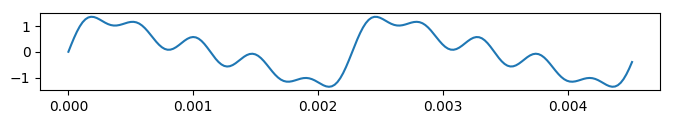

In [0]:
fig,ax=plt.subplots(figsize=(8,1))
ax.plot(t[:200],signal[:200]);

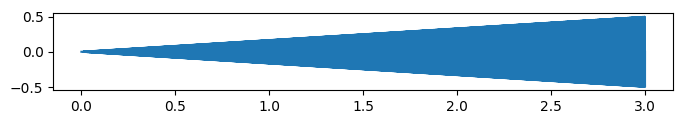

In [0]:
"""we must be carful: usualy, intensity of sound must stay in [0,1]"""
maxiSig=np.max(signal)
volume=t/t[-1]/maxiSig/2
signal*=volume

fig,ax=plt.subplots(figsize=(8,1))
ax.plot(t,signal);

In [0]:
sf.write('la440.wav', signal, samplerate)

In [0]:
IPython.display.Audio('la440.wav')

### Create a music Khaliq Aghakarimov

To create a music, we have to concatenate several note. But  transitions must be smooth to avoid some short noise 'tack'.  Observe:

In [0]:
samplerate = 11025

duration0=1.3
duration1=2.6

nb0=int(duration0*samplerate)
nb1=int(duration1*samplerate)
nb=nb0+nb1
t=np.linspace(0,duration0+duration1,nb)
signal0=np.sin(2*np.pi*t*2)
signal1=np.sin(2*np.pi*t*5)

window0 = np.zeros(nb)
window1 = np.zeros(nb)


In [0]:
"""transition abrupte"""
window0[:nb0]=1
window1[nb0:]=1

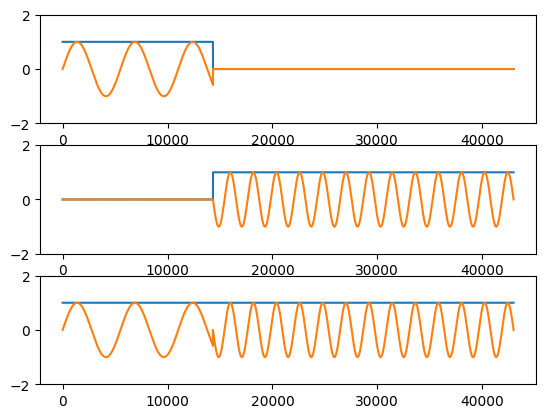

In [0]:
def plot_all():
    plt.subplot(3,1,1)
    plt.plot(window0)
    plt.plot(window0*signal0)
    plt.ylim([-2,2])
    plt.subplot(3,1,2)
    plt.plot(window1)
    plt.plot(window1*signal1)
    plt.ylim([-2, 2])
    plt.subplot(3,1,3)
    plt.plot(window0+window1)
    plt.plot(window0*signal0+window1*signal1)
    plt.ylim([-2, 2])
    
plot_all()

In [0]:
sf.write("raw_transi.wav",window0*signal0+window1*signal1,samplerate)

In [0]:
IPython.display.Audio("raw_transi.wav")

The previous sound is not audible (too low frequency), but you can hear the raw transition. 

In [0]:
demiTransition = int(0.1 * samplerate)
montee = np.linspace(0, 1, 2 * demiTransition)
descente = 1 - montee
window0[:nb0 - demiTransition] = 1
window0[nb0 - demiTransition:nb0 + demiTransition] = descente
window1[nb0 + demiTransition:] = 1
window1[nb0 - demiTransition:nb0 + demiTransition] = montee

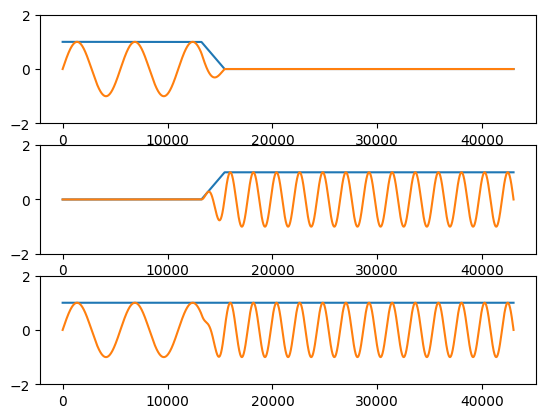

In [0]:
plot_all()

In [0]:
sf.write("soft_transi.wav",window0*signal0+window1*signal1,samplerate)

In [0]:
IPython.display.Audio("soft_transi.wav")

Now the transition is soft, we get a perfect silence.

***To you:*** $(2\heartsuit)$ Remake these two transitions, but with audible sounds. 

***Bonus:*** Write a little melody. The correspondance "note $\to$ frequency" can be easily found on the net. To win: 

* $4\star$ for a five notes melody with smooth transition of course.
* $4\star$ more, if we recognise a true musical melody  
* $4\star$ more if you optimize the previous code:  I have created one long vector per note: instead, you can create only one long vector and change it part by part to make the melody. 

### Spectrogram Khaliq Aghakarimov

To analyse long signal, it is often better to make a spectrogram than a simple Fourier Transform. Here is the process:

* We cut the signal in short slices, sufficiently short so that, in every slice, the signal is homogenious (like a simple mixture of sinus-waves). 
* Then we compute the fft for every slice.
*  fft are stack as in columns of a matrix
* This matrix is plot with a colormap.

Such process is also called a "time-frequency analysis"

Text(0.5, 0, 'Time [sec]')

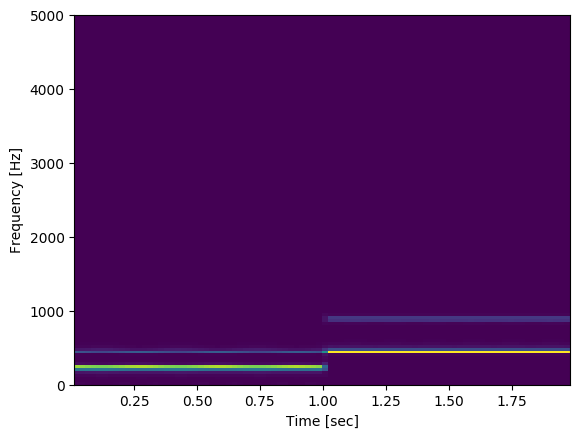

In [0]:
import scipy.signal

epsilon = 0.0001
t = np.arange(0, 1, epsilon)

sig_debut = 0.5 * np.sin(t * 2 * np.pi * 440) + np.sin(t * 2 * np.pi * 220)
sig_fin = 0.5 * np.sin(t * 2 * np.pi * 880) + np.sin(t * 2 * np.pi * 440)
sig=np.concatenate((sig_debut, sig_fin))


"""d'après l'aide officielle : https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.spectrogram.html """
f, t, Sxx = scipy.signal.spectrogram(sig, 1/epsilon)
plt.pcolormesh(t, f, Sxx)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')

***To you:*** $(3\heartsuit)$ Plot the spectrogram of some  short sounds of your choice (put it before in your working directory). Try to link what you hear and what you see.

## Pics detection Khaliq Aghakarimov

### Make a rolling window Khaliq Aghakarimov

In [0]:
def rolling_window(data, window_length):
    output_shape = data.shape[:-1] + (data.shape[-1] - window_length + 1, window_length)
    strides = data.strides + (data.strides[-1],)
    return np.lib.stride_tricks.as_strided(data, shape=output_shape, strides=strides)

In [0]:
data=np.arange(0,11,1)
data

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [0]:
roll=rolling_window(data,3)
roll

array([[ 0,  1,  2],
       [ 1,  2,  3],
       [ 2,  3,  4],
       [ 3,  4,  5],
       [ 4,  5,  6],
       [ 5,  6,  7],
       [ 6,  7,  8],
       [ 7,  8,  9],
       [ 8,  9, 10]])

In [0]:
roll.shape

(9, 3)

***To you:*** $(2\heartsuit)$ Give the formula which links the shapes of  input and output of `rolling_window()`.  A drawing with a long vector, and a rolling window inside could help you to understand. 

***To you:*** $(1\heartsuit)$ what does the `rolling_window()` function when the input `data` is not a vector, but a general `ndarray` (ex: a matrix).

### To find the local max Khaliq Aghakarimov

In [0]:
def findLocalMax(data,windowLength):
    dataRoll=rolling_window(data,windowLength)
    armax=np.argmax(dataRoll,axis=1)
    where=np.where(armax==(windowLength//2))
    return where[0]+windowLength//2

[ 4 12]


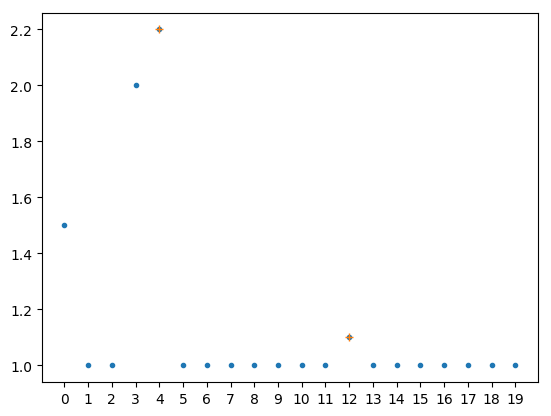

In [0]:
data=np.ones(20)
data[0]=1.5
data[3]=2
data[4]=2.2
data[12]=1.1
plt.plot(range(len(data)),data,".");
plt.xticks(range(len(data)));

locMax=findLocalMax(data,5)
print(locMax)
plt.plot(locMax,data[locMax],"+");

***To you:*** 
* $(2\heartsuit)$ Explain how `findLocalMax()` works, in particular: What is the influence of the `windowLength` and why is it better to choose an odd integer.
* $(3\heartsuit)$ This function does not detect the picks if they are situated at the extremities of the `data` vector. Modify its, adding the optionnal arg `alsoDetectBorderPick=True`.

### On a physical signal Khaliq Aghakarimov

Here is a physical signal with two channels. With a simple observation left and right channels seem completly different.

In [0]:
signal_phy, samplerate = sf.read('assets_signal/Sample.wav')
signal_phy.shape,samplerate

((1440000, 2), 48000)

In [0]:
def plot_a_part(x,y,index):
    fig,(ax0,ax1)=plt.subplots(2,1,figsize=(8,4),sharex=True)
    ax0.plot(x[:index],y[:index,0])
    ax1.plot(x[:index],y[:index,1])
    ax0.set_title("left")
    ax1.set_title("right")
    fig.tight_layout()

In [0]:
N=len(signal_phy)
t=np.linspace(0,N*samplerate,N)

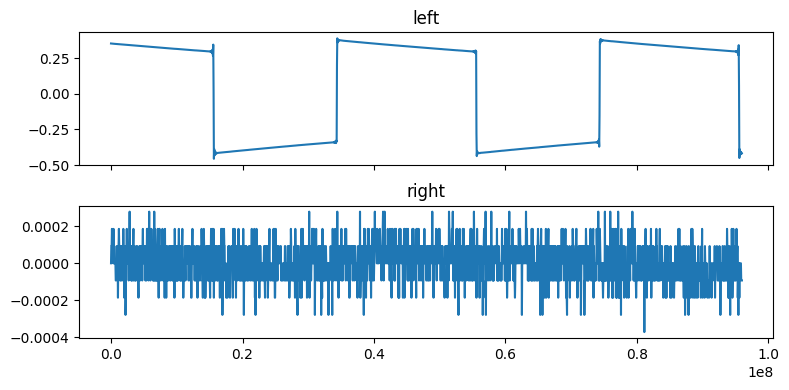

In [0]:
plot_a_part(t,signal_phy,2000)

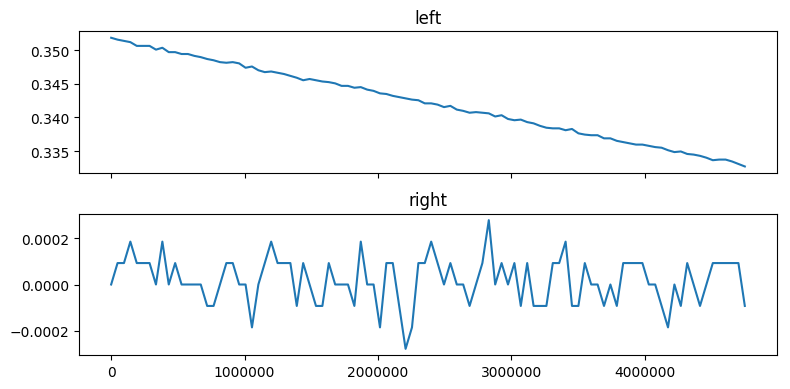

In [0]:
plot_a_part(t,signal_phy,100)

The left channel is quite regular, while the right one move a lot. But let's observe their respective Fourier transform.

In [0]:
spectrum_phy0=np.fft.rfft(signal_phy[:,0])
spectrum_phy1=np.fft.rfft(signal_phy[:,1])
spectrum_phy=np.stack([spectrum_phy0,spectrum_phy1],axis=1)
spectrum_phy.shape

(720001, 2)

Warning: the code

        spectrum_phy=np.fft.rfft(signal_phy)

would not gives what we expect (Grrrr).

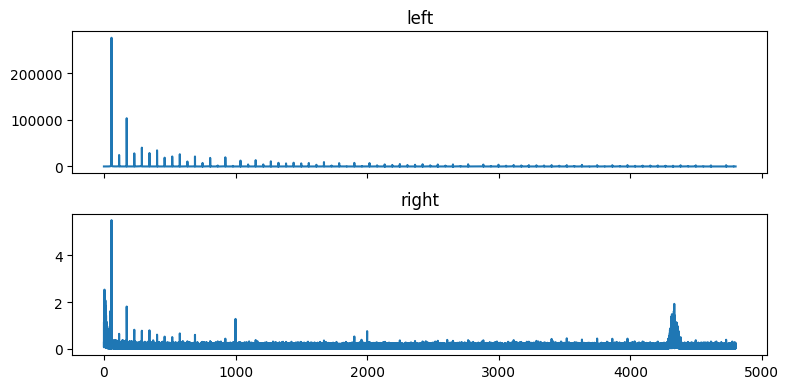

In [0]:
freqs=np.linspace(0,samplerate/2,len(spectrum_phy))
plot_a_part(freqs,np.abs(spectrum_phy),N//10)

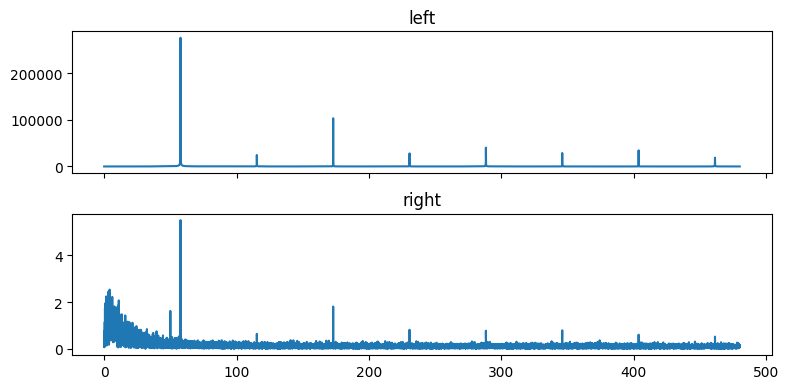

In [0]:
plot_a_part(freqs,np.abs(spectrum_phy),N//100)


We see that the two signals are actualy strongly correlated: they have the same pick of frequencies.

Explanation: 

* the left signal is an electric signal, generated with an electronic device. Its is use to exitate a liquid

* the right signal is the output of a sensor dived in the liquid. 


***To you:*** Detect the pics of both signals. 
* $(2\heartsuit)$ Superpose this pic with the signals 
* $(2\heartsuit)$  Superpose left and right pics to compare them


***To you:*** $(2\heartsuit)$ Describe a technic of extreme compression for sounds, which allows to say if two sounds are close or not. 

Example: your technic could says if two signals are actually two recordings of the song "toxic" by "Britney Spear".

If you would had this idea before 2012, you would been the inventor of the famous software "shazam".   


